Let's look again at the scottish hills race data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

hills = pd.read_table("http://www.statsci.org/data/general/hills.txt")
hills

,Race,Distance,Climb,Time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,CraigDunain,6.0,900,33.650
3,BenRha,7.5,800,45.600
4,BenLomond,8.0,3070,62.267
5,Goatfell,8.0,2866,73.217
6,BensofJura,16.0,7500,204.617
7,Cairnpapple,6.0,800,36.367
8,Scolty,5.0,800,29.750
9,Traprain,6.0,650,39.750


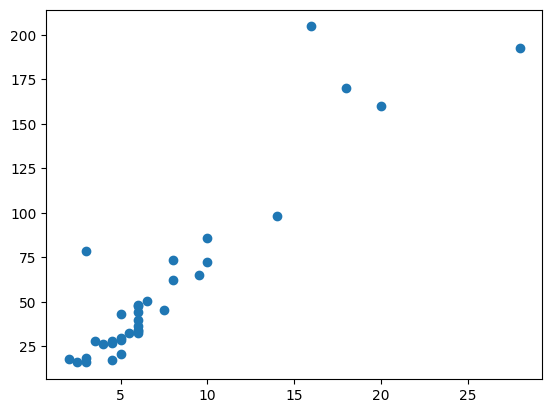

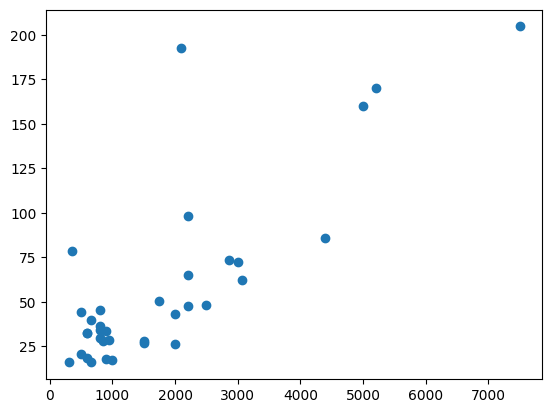

In [5]:
plt.scatter(hills.Distance,hills.Time)
plt.show()

plt.scatter(hills.Climb,hills.Time)
plt.show()

In [6]:
mod = smf.ols("Time ~ Distance + Climb",hills).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     181.7
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           3.40e-18
Time:                        18:42:26   Log-Likelihood:                -142.11
No. Observations:                  35   AIC:                             290.2
Df Residuals:                      32   BIC:                             294.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.9920      4.303     -2.090      0.045     -17.756      -0.228
Distance       6.2180      0.601     10.343      0.000       4.993       7.442
Climb          0.0110      0.002      5.387      0.000       0.007       0.015
==============================================================================
Omnibus:                       47.910   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.976
Skew:                           3.026   Prob(JB):                     1.56e-51
Kurtosis:                      14.127   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretting this, we would say that at the same climb, the expected time increases by 6.2 minutes for every addition mile. For the same distance, the expected time would increase by 0.011 minutes for foot of elevation change.

We want some uncertainty around the variable for distance, meaning instead of just saying the expected value changes by 6.2 minutes, we want to say it changes somewhere between () and () minutes.

View all the confidence intervals for the parameters.

In [7]:
mod.conf_int()

,0,1
Intercept,-17.756422,-0.227656
Distance,4.993458,7.442454
Climb,0.006870,0.015225


In [8]:
conf_distance = mod.conf_int().loc["Distance"]

print("The 95% Confidence interval for the expected change in time of the race for every additional mile is (",f'{conf_distance[0]:.2f}',",",f'{conf_distance[1]:.2f}',")")

The 95% Confidence interval for the expected change in time of the race for every additional mile is ( 4.99 , 7.44 )


In [9]:
print("We are 95% confident that the expected change in time per mile is between",f'{conf_distance[0]:.2f}'," and ",f'{conf_distance[1]:.2f}'," minutes")

We are 95% confident that the expected change in time per mile is between 4.99  and  7.44  minutes
